In [2]:
from vpython import *
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit #used to find the fit parameters

<IPython.core.display.Javascript object>

# Goal of this project

Using arrays to track how long it takes for the particles to reach the bottom of the plinko board, while also tracking where a particle starts, this program will determine the average time that it takes for the balls to reach the bottom and determine if the data is constant.

Through testing, the time it takes to reach the bottom varies, sometimes going very quickly, sometimes taking longer. Using various iterations, the code determines the average time it takes for each iterations of 10 balls. The program can be ran multiple times in order to collect a larger data sample.

# Analysis of the timing with a Plinko Board

The following project was designed in order to analysis how long it take a ball to reach the bottom of a given plinko board. First, we will analyse what factors will affect the outcome.

1. The plinko board uses a total of 336 rods that affect the movement of the ball on the way down.
2. Fgrav is defined by m*g with g being equal to 9.8 meters per second
3. The mass of each ball is defined by m and is equal to 2 kilograms
4. The rods are spreaded out over a length of 50 meters and a height of 15 meters
5. The radius of the ball is .75 meters and the radius of each rod is .1 meters
6. The ball is dropped in a random position (given that 0 is equal to the middle of the board) from -24 meters to 24 meters.
7. The ball is given an initial x velocity of -4 per second to 4 meters per second. However, the initial x velocity will never be equal to 0.
8. After each collision with a rod, energy loss is calculated by multiplying the current energy by .5

# Calculation and Equations

A variety of calculations and equations were used to calculate the balls velocity, positions and effect when it hits a rod or wall.

1. Velocity Update Equation: ball.v = ball.v + Fgrav/m * dt
2. Position Update Equation: ball.pos = ball.pos + ball.v * dt
3. Collision with a rod: Velocity tangent stays the same since we are assumining no friction, Velocity radial is along the direction of the rod based on the point of impact. Upon a collision, velocity radial is reversed and dividied by 2 in order to show a loss of energy due to a collision. Velocity radial is calculated by the dot product of ball.v and rhat (rhat is the hat of the distance between the center of the ball and the center of the rod) multiplied by rhat. 
4. When a ball collides with the left wall, the balls x velocity is set equal to the absolute value of its current x velocity. Ifthe ball collides with the right wall, the same is done but it is set equal to the negative absolute value of its x velocity.

In [3]:
scene1 = canvas(title="Plinko Board - Advanced", background=color.white)

g = 9.8      #gravity constant
m = 2       #mass of ball in kilograms
Fgrav = vec(0,-m*g,0)
rball = .75    #radius of ball
rrod = .1     #radius of rod

#Below, the walls are initialized and placed on the canvas
Lwall = box(pos = vec(-25, 0, 0), size = vec(1, 30, 1), color=color.cyan)
Rwall = box(pos = vec(25, 0, 0), size = vec(1, 30, 1), color=color.cyan)
Bwall = box(pos = vec(0, -15, 0), size = vec(50, 1, 1), color=color.cyan)

#Below, the ball is created and given an initial random starting position and random velocity
ball = sphere(pos = vec(rand.uniform(-24,24),16,0), radius = rball, color=color.green)
#ball.v = vec(rand.uniform(-4,4),0,0)
ball.v = vec(0,0,0)

#This while loop ensures the ball's initial x velocity is never equal to 0
#while ball.v.x == 0:
#    ball.v.x = rand.uniform(-4,4)
    
#Below, the rods are created in a staggering pattern using an alternating placement method
rod = []
even = 0
for i in range(-23,24,2):
    if even == 0:
        even+=1
        for j in range(-13,15,2): 
            rod.append(cylinder(pos = vec(i,j,-0.25), color=color.black, axis = vec(0,0,.5), radius=rrod, collided=False))
    elif even == 1:
        even -= 1
        for j in range(-13,15,2):
            rod.append(cylinder(pos = vec(i,j+1,-0.25), color=color.black, axis = vec(0,0,.5), radius=rrod, collided=False))

#Below, the total time is tracked and the change in time for each iteration of the loop is declared
t = 0
dt = 0.001

#alist, tlist and slist are declared below
tlist = [] #list of time taken by each ball
slist = [] #list of start position

#Scene pauses and await user input before continuing
scene1.pause()

#Below is the main loop for the calculation, the code is currently configure to cycle through 10 balls by
#tracking the start position and total time taken in order to add to the arrays that create the histogram
for i in range(100):
    slist.append(ball.pos.x)
#Below is the while loop for the program that calculates the different collisions, and other neccessary 
#calculations for the ball
    while ball.pos.y > -15:
        rate(100000000)

    #The next two lines calculate the velocity and position update equations
        ball.v = ball.v + Fgrav/m*dt
        ball.pos = ball.pos + ball.v*dt 

    #This for loop determines if a ball is collided with a rod and calculates the collision from there
    #an energy lose of 1/2 is calculated as a result of each collision
        for i in range(len(rod)):
            rodcenter = rod[i].pos+rod[i].axis/2
            r = ball.pos - rodcenter
            if mag(r) < rrod+rball and rod[i].collided==False:
                rhat = hat(r)
                vballrad = dot(ball.v,rhat)*rhat #rad comp of ball.v
                vballtan = ball.v - vballrad #tan comp of ball.v
                vballrad = -vballrad * .5 #reverse ball.rad due to collision
                ball.v = vballtan + vballrad #new ball velocity after colision
                rod[i].collided=True
            elif mag(r) > rrod+rball and rod[i].collided==True:
                rod[i].collided=False

    #The following if statements determine if the ball is colliding with a wall and calculates the collision
        if ball.pos.x >= 24.5:
            ball.v.x = - abs(ball.v.x)
        elif ball.pos.x <= -24.5:
            ball.v.x = abs(ball.v.x)

    #The time is incremented by dt
        t = t + dt
        
#The tlist variable is tracked below
    tlist.append(t)
#Time is reset to 0 before the ball is reset to the top
    t = 0
#The ball is reset to the top
    ball.pos.y = 16
#The ball is given a new random position and initial x velocity
    ball.pos.x = rand.uniform(-24,24)
    ball.v.x = rand.uniform(-4,4)
#The while loop ensures that the x velocity is not equal to 0
    while ball.v.x == 0:
        ball.v.x = rand.uniform(-4,4)    


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Histogram

Below is the code to create the histogram that compares a given ball's start position compared to how long it took for the ball to reach the bottom. The code below uses the follwing variables:
1. slist - This is the array that keeps track of the start position for each ball
2. tlist - This is the array that keeps track of how long it take for each ball to reach the bottom

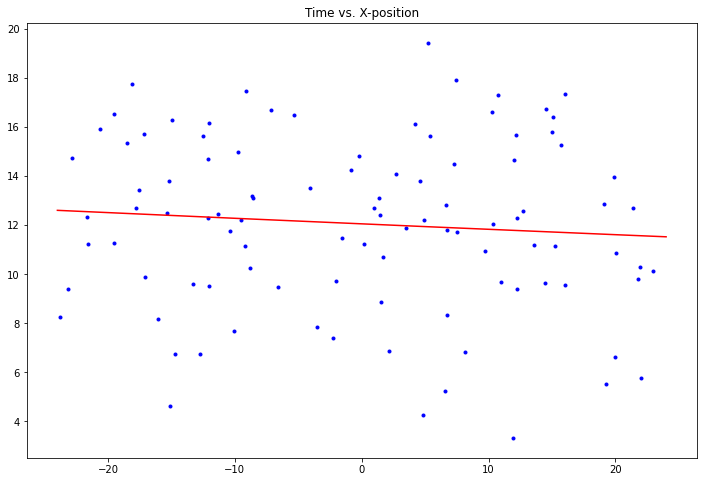

In [4]:
#Curve Fit
model = lambda x,A,T: A*np.exp(-x/T)

params, covariance = curve_fit(model,slist,tlist)
tmodel = np.linspace(-24,24,10000)
Vmodel = model(tmodel,*params)

#plot scatter graph
plt.figure(figsize=(12,8))
plt.title('Time vs. X-position')
plt.plot(slist, tlist, '.b')
plt.plot(tmodel, Vmodel, 'r-')
plt.show()

In [5]:
total = 0
for i in range(len(tlist)):
    total += tlist[i]

averageTime = total/100
print("Average Time to Reach Bottom: ",averageTime)

Average Time to Reach Bottom:  12.061679999998796


In [6]:
dlist = []

for i in range(len(tlist)):
    if tlist[i] > averageTime:
        dlist.append(tlist[i] - averageTime)
    else:
        dlist.append(averageTime - tlist[i])

count = 0
for i in range(len(dlist)):
    count += dlist[i]

averageDev = count / 100
print("Average Deviation from Curve Fit: ",averageDev)

Average Deviation from Curve Fit:  2.815079199998942


### Conclusion
As is seen in the above graph, the results vary with outliers taking less and longer to reach the bottom. However, the curve fit shows that if the simulation was run with more trials, the curve fit would likely be almost perfectly flat.

The average deviation printed above shows, on average, how fare away the ball is away from the curve fit on the y-plane.